# Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

In [1]:
# import necessary libraries/packages

import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime, timedelta
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
# read in the logins data for users from the .json file

logins_file_path = 'C:/Users/matmi/OneDrive/Documents/Springboard/TakeHomeChallenges/1631809090_1481053515_ultimate_challenge_3_/ultimate_challenge/logins.json'
logins_file = open(logins_file_path)
df_logins = pd.read_json(logins_file_path)

In [3]:
df_logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# confirm login_time is a datetime object
df_logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [5]:
def count_logins(period: str='15T', df: pd.DataFrame=df_logins, df_col: str='login_time'):
    """
    Aggregate total number of logins for specific intervals (i.e. daily, monthly, 15min, 30min)
    """
    df_window = df.resample(period, on=df_col).count().rename(columns={'login_time': 'Total Logins'})
    return df_window

In [6]:
# resample df_logins and aggregate on every 15 minute time interval
df_15mins = count_logins(period='15T')
df_15mins

,Total Logins
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
...,...
1970-04-13 17:45:00,5
1970-04-13 18:00:00,5
1970-04-13 18:15:00,2


In [7]:
# check for null values
df_15mins.isnull().sum()

Total Logins    0
dtype: int64

In [8]:
def plot_logins(df: pd.DataFrame=None, x_label: str='Date', y_label: str='# of logins', title: str=None):
    """
    Plot any dataframe for logins over a specified date time
    """
    plt.figure(figsize=(15,10))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.plot(df)
    plt.show()

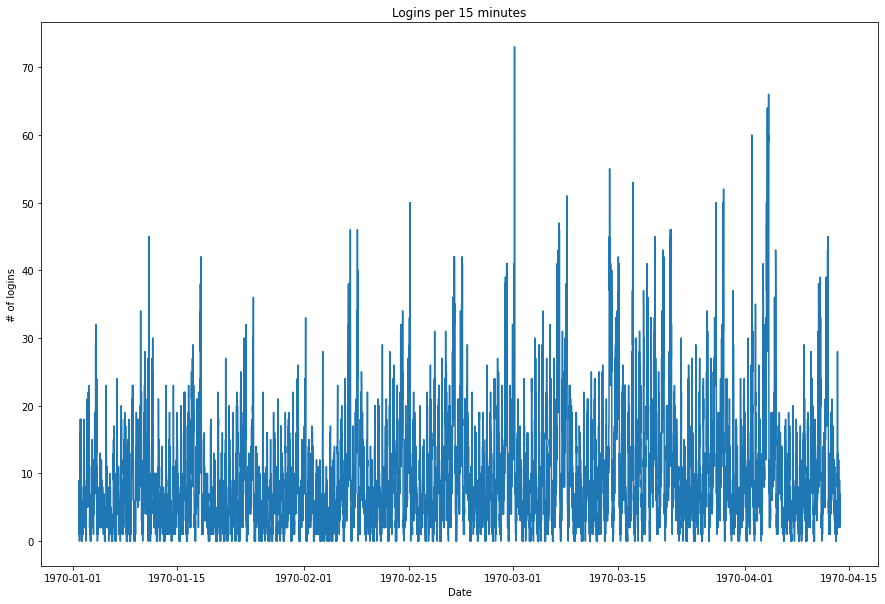

In [9]:
# plot the aggregated logins

plot_logins(df=df_15mins,  title='Logins per 15 minutes')

### Note: 
- There appears to be some seasonality/periodicity in the time series data. 
- From a quick look it appears to spike every 7 days, which may correlate with the weekends. 
- The end of February or beginning of March is displaying a large spike in activity.

In [10]:
# resample the data on a monthly basis and aggregate the results
# df_logins.resample('M', on='login_time').count().rename(columns={'login_time': 'Total Logins'})

df_monthly = count_logins('M') 
df_monthly

,Total Logins
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


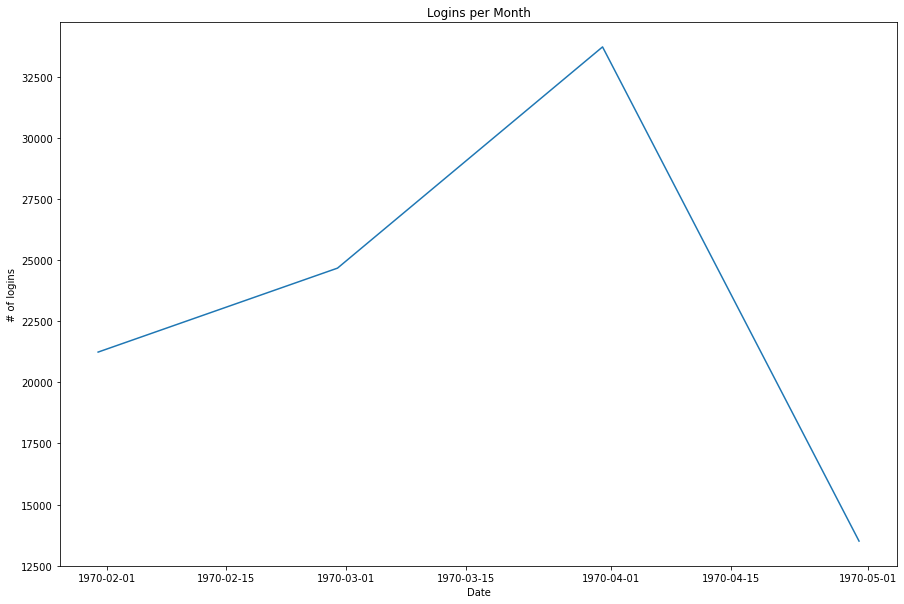

In [11]:
# plot the monthly logins

plot_logins(df=df_monthly,  title='Logins per Month')

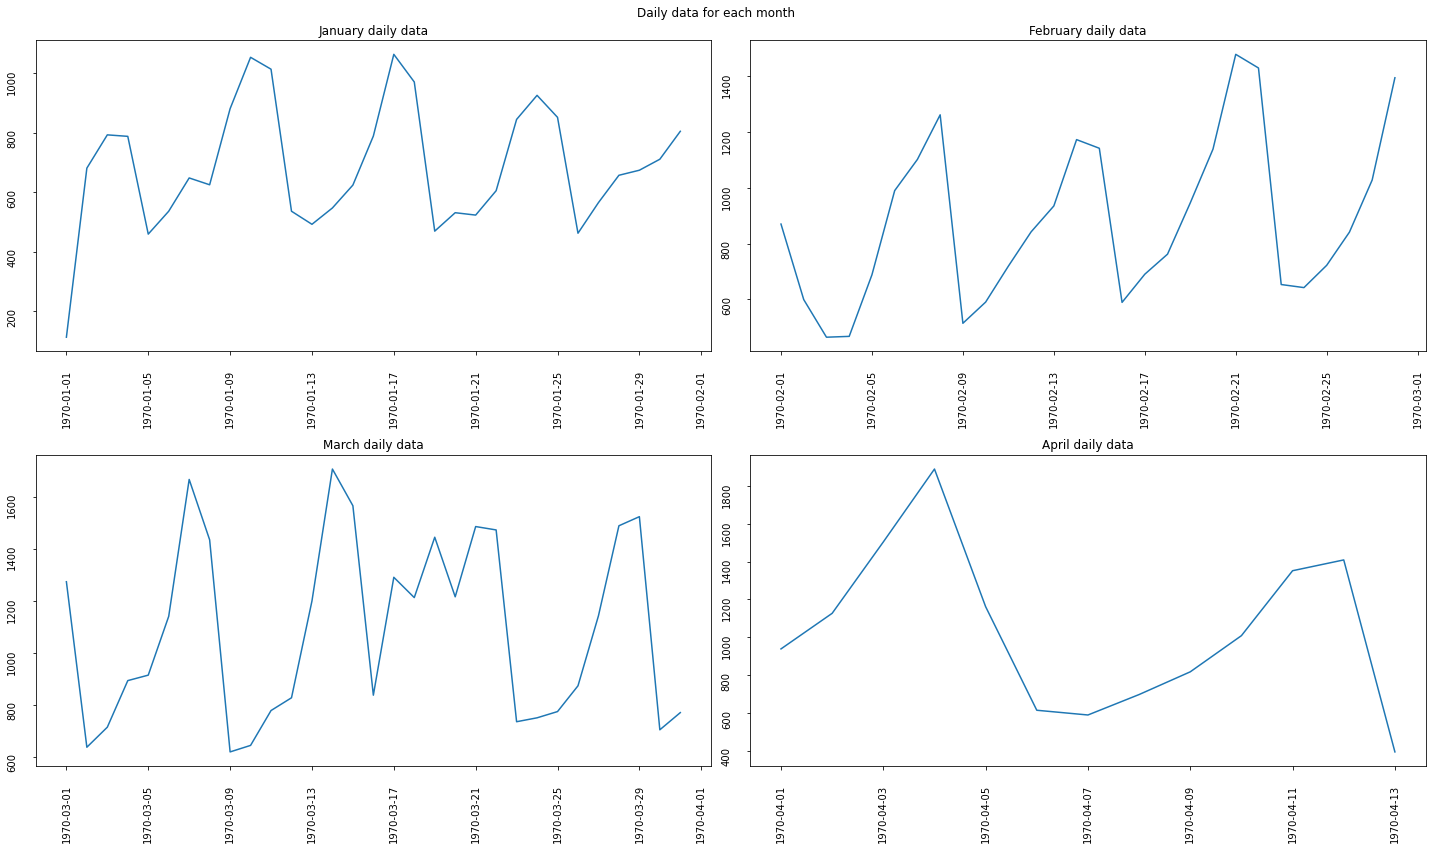

In [12]:
# define a new dataframe for each month and plot the results

df_Jan = df_logins[df_logins['login_time'].dt.month == 1]
df_Feb = df_logins[df_logins['login_time'].dt.month == 2]
df_Mar = df_logins[df_logins['login_time'].dt.month == 3]
df_Apr = df_logins[df_logins['login_time'].dt.month == 4]

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

plt.suptitle('Daily data for each month')

ax1.plot(df_Jan.resample('D', on='login_time').count())
ax1.set_title('January daily data')
ax1.tick_params(axis='both', direction='out', pad=15, rotation=90)

ax2.plot(df_Feb.resample('D', on='login_time').count())
ax2.set_title('February daily data')
ax2.tick_params(axis='both', direction='out', pad=15, rotation=90)

ax3.plot(df_Mar.resample('D', on='login_time').count())
ax3.set_title('March daily data')
ax3.tick_params(axis='both', direction='out', pad=15, rotation=90)

ax4.plot(df_Apr.resample('D', on='login_time').count())
ax4.set_title('April daily data')
ax4.tick_params(axis='both', direction='out', pad=15, rotation=90)

figure.tight_layout()
plt.show()

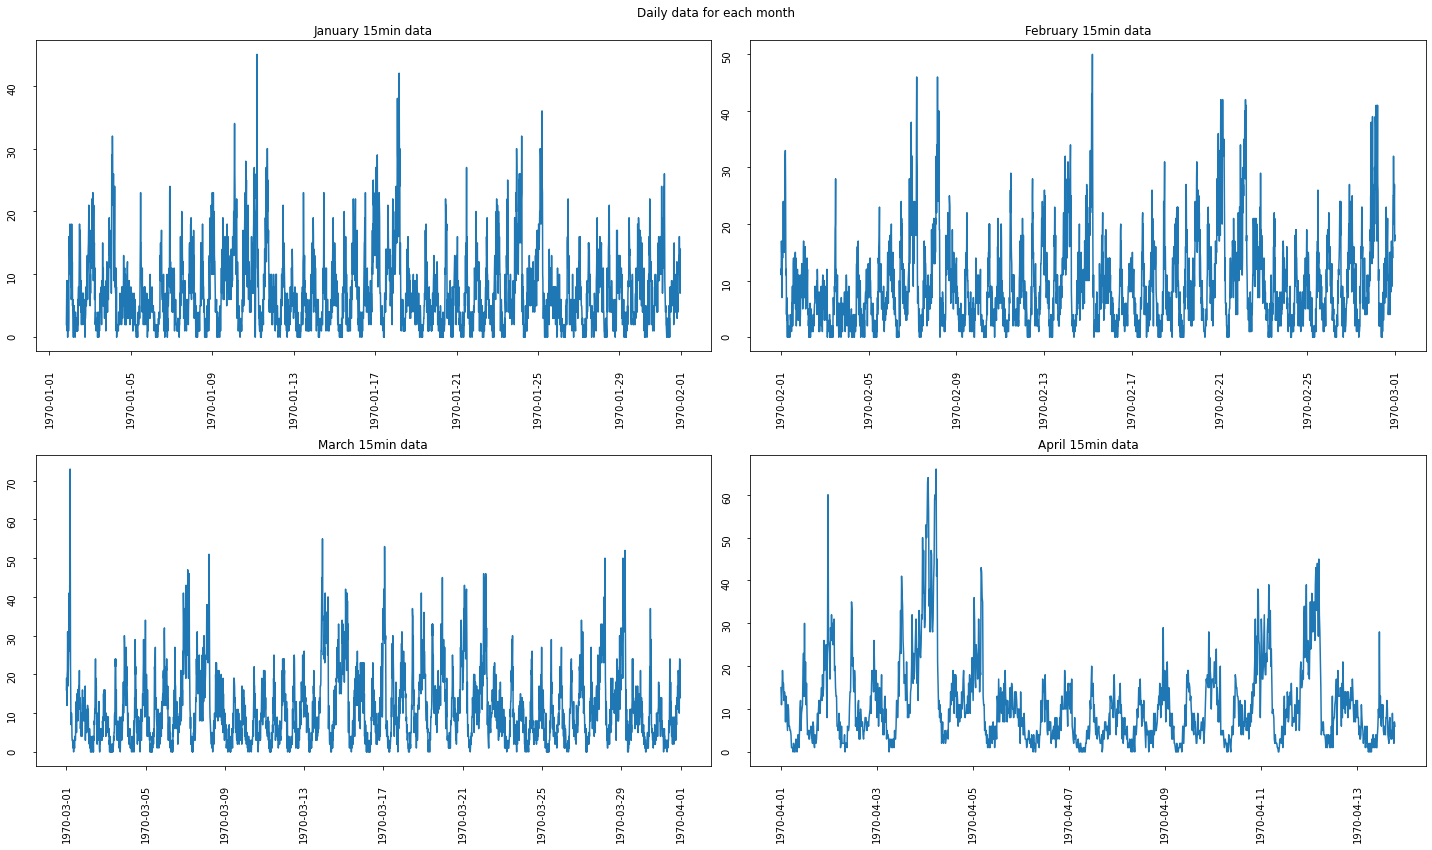

In [13]:
# plot the 15min logins interval for each month

figure, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,12))

plt.suptitle('Daily data for each month')

ax1.plot(df_Jan.resample('15T', on='login_time').count())
ax1.set_title('January 15min data')
ax1.tick_params(axis='both', direction='out', pad=15, rotation=90)

ax2.plot(df_Feb.resample('15T', on='login_time').count())
ax2.set_title('February 15min data')
ax2.tick_params(axis='both', direction='out', pad=15, rotation=90)

ax3.plot(df_Mar.resample('15T', on='login_time').count())
ax3.set_title('March 15min data')
ax3.tick_params(axis='both', direction='out', pad=15, rotation=90)

ax4.plot(df_Apr.resample('15T', on='login_time').count())
ax4.set_title('April 15min data')
ax4.tick_params(axis='both', direction='out', pad=15, rotation=90)

figure.tight_layout()
plt.show()

## Seasonality Trends Analysis

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose

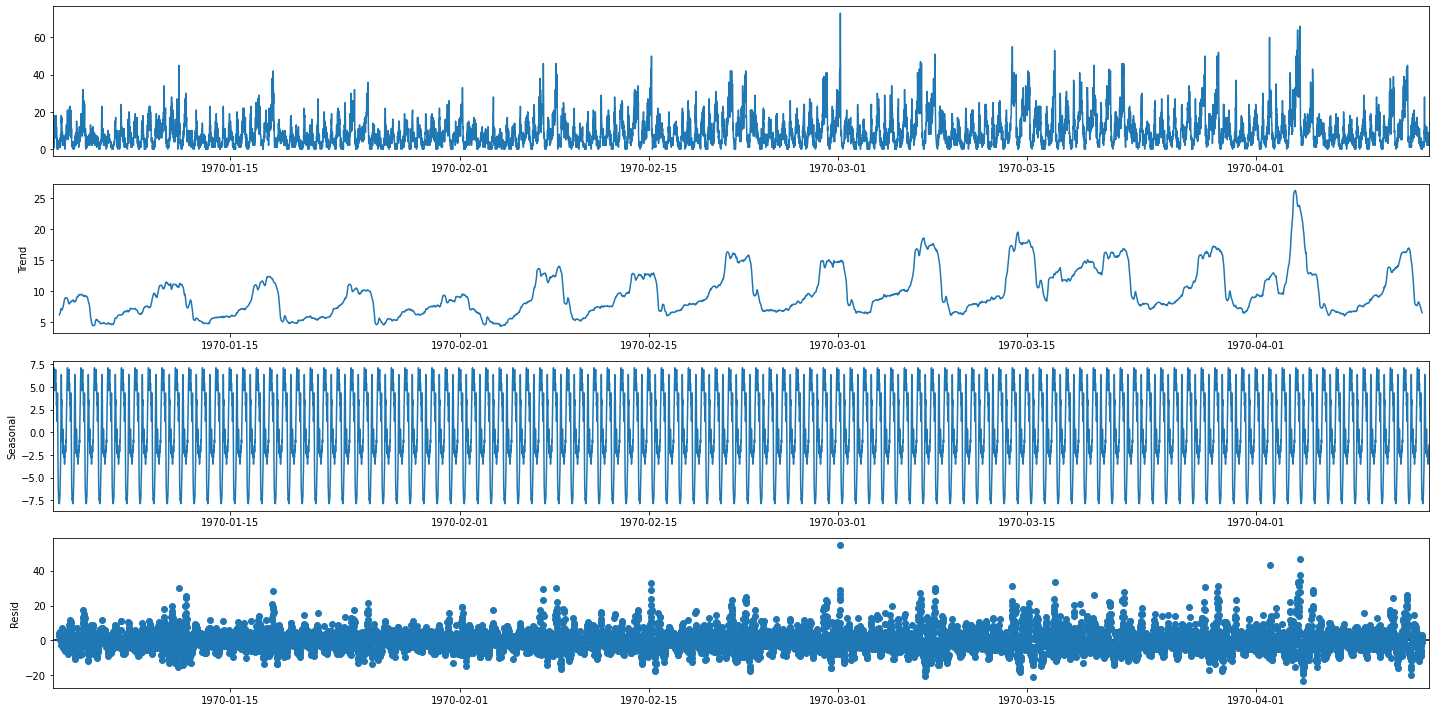

In [15]:
plt.rcParams['figure.figsize'] = (20, 10)
result = seasonal_decompose(df_15mins, model='additive', period=96) # period=96; 24 hours per day and 4*15min periods per hour
result.plot()
plt.show()

# Plan:

- Plot the average hourly logins per day
    - could just be a simple bar graph to determine time of day people are most active
    - Advanced plot would be in the form of a clock; some type of bar graph in a circle or a heatmap of sorts
    
- Plot the average daily logins for each weekday

In [16]:
df_30mins = count_logins('30T')
df_30mins

,Total Logins
login_time,
1970-01-01 20:00:00,8
1970-01-01 20:30:00,16
1970-01-01 21:00:00,5
1970-01-01 21:30:00,4
1970-01-01 22:00:00,17
...,...
1970-04-13 16:30:00,7
1970-04-13 17:00:00,8
1970-04-13 17:30:00,14


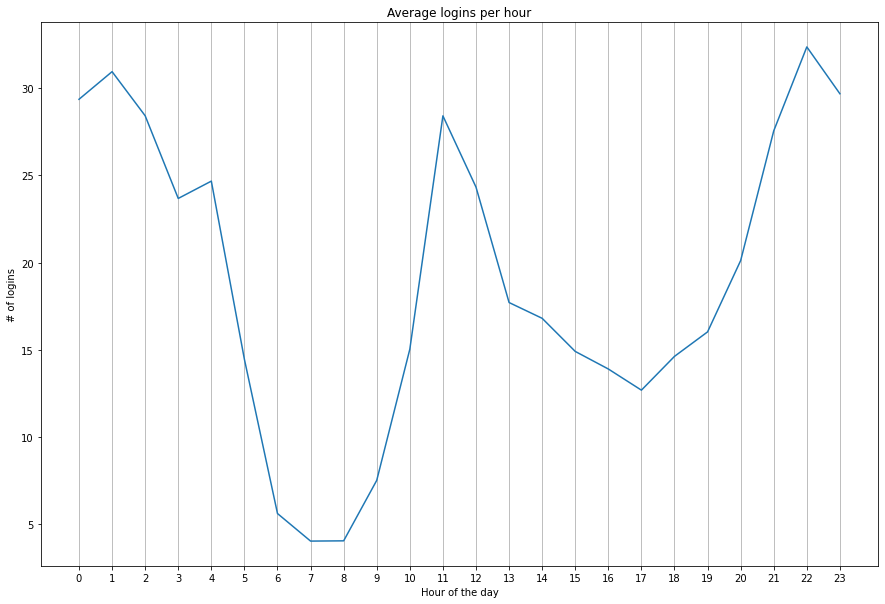

In [17]:
hourly = df_30mins['Total Logins'].groupby(df_30mins.index.hour).mean()

plt.figure(figsize=(15,10))
plt.xlabel('Hour of the day')
plt.ylabel('# of logins')
plt.title('Average logins per hour')
plt.plot(hourly)
plt.xticks(np.arange(0, 24, 1))
plt.gca().xaxis.grid(True)
plt.show()

# plot_logins(hourly, x_label='Hour of the day')

- Two spikes can be seen each day; one during the day and one at night
    - During the day the logins spike between 10am and 1pm 
    - At night the logins spike between 9pm and 2am 
    - There is very little activity between the hours of 5am and 9am

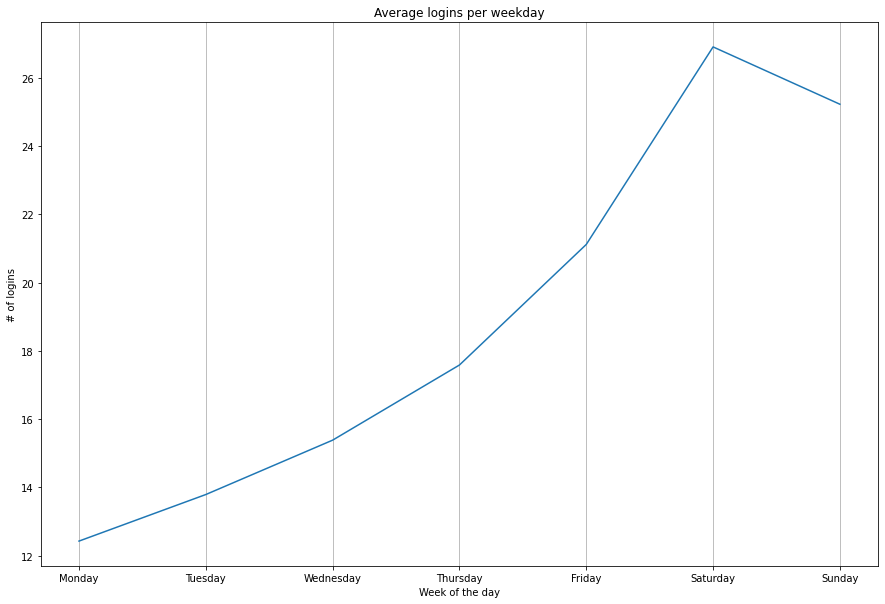

In [18]:
weekly = df_30mins['Total Logins'].groupby(df_30mins.index.weekday).mean()
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(15,10))
plt.xlabel('Week of the day')
plt.ylabel('# of logins')
plt.title('Average logins per weekday')
plt.plot(weekly)
plt.xticks([x for x in range(0,7,1)], weekdays)
plt.gca().xaxis.grid(True)
plt.show()

- Clear rise in user logins as the week goes on peaking on the weekend days
- Least average logins on Monday and most on Saturday

# Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1) What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    
**The metric that would best evaluate the new reimbursement experiment is to calculate the average number of driver partners who drive across the bridge per day. If the average number of driver partners increases, then we can further investigate if it was a direct effect of the reimbursement strategy.**

2) Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:

    a) how you will implement the experiment
    
**I would implement the experiment by implementing the new strategy by selecting a set of driver partners who have been with the company for at least one month. Then I would have these driver partners participate in the program for at least a month.**
    
    b) what statistical test(s) you will conduct to verify the significance of the observation
    
**I would use a hypothesis test to determine if the new strategy impacted driver partners' behaviors. I would define the null hypothesis and alternative hypothesis as follows:**

**H(0): The average number of driver partners who cross the bridge per day is the same before and after the reimbursement program.**

**H(1): The average number of driver partners who cross the bridge per day is different before and after the reimbursement program.**



    c) how you would interpret the results and provide recommendations to the city operations team along with any caveats.

**First, I would like to determine if the number of driver partners increased in a statistically relevant way. I would use a correlation test to evaluate if the change is statistically significant. If the p-value is < 0.05, then we can reject the null hypothesis and consider the new reimbursement program is successful. I would suggest maintaining the reimbursement program in this case, however, the city should ensure that they are also increasing profitability after introducing the new program.**

**Another test that could be useful, is to determine if the increase in transit across the toll bridge is comparable from each direction. The city should be interested in understanding if driver partners are travelling both from Gotham to Metropolis and Metropolis to Gotham. This could give us some insight into the popularity of each city and could help understand further developments."**

**If the p-value is > 0.05, then we can assume the program did not change the driver partners behavior, and a new strategy will be required. In this case a deeper study into the behaviors of the passengers in each city. We would need to know if a new reason for the exclusivity, including if the issue stems from the users requesting rides.**



*Note: The two cities of Gotham and Metropolis are not in the provided dataset; however, you do not need this information to answer Part 2.*

# Part 3 ‐ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days. 

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate. 

The data is in the attached file ultimate_data_challenge.json. See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?

In [19]:
ult_file_path = r'C:\Users\matmi\OneDrive\Documents\Springboard\TakeHomeChallenges\1631809090_1481053515_ultimate_challenge_3_\ultimate_challenge\ultimate_data_challenge.json'
ult_file = open(ult_file_path)
ult_df = pd.read_json(ult_file_path)

In [20]:
ult_df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [21]:
ult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [22]:
ult_df.isna().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [23]:
# fill null values w/ mean values for avg_rating_of_driver and avg_rating_by_driver columns
# fill null values w/ 'N/A' for null values in phone column

ult_df['avg_rating_of_driver'].fillna(ult_df.avg_rating_of_driver.mean(), inplace=True)
ult_df['avg_rating_by_driver'].fillna(ult_df.avg_rating_by_driver.mean(), inplace=True)

ult_df['phone'].fillna('N/A', inplace=True)

In [24]:
ult_df.isna().sum()

city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64

In [25]:
ult_df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [26]:
# convert all columns with dates to datetime objects

ult_df.last_trip_date = pd.to_datetime(ult_df.last_trip_date)
ult_df.signup_date  = pd.to_datetime(ult_df.signup_date)

In [27]:
# create a new column to determine if the user (0: not retained | 1: user retained)

active_date = ult_df.last_trip_date.max() - pd.to_timedelta(30, unit='d')
ult_df['user_retainment'] = [1 if x > active_date else 0 for x in ult_df.last_trip_date]

In [28]:
print(f"Fraction of observed users retained: {len(ult_df[ult_df['user_retainment'] == 1]) / len(ult_df)}")

Fraction of observed users retained: 0.3662


In [29]:
ult_df.city.unique()

array(["King's Landing", 'Astapor', 'Winterfell'], dtype=object)

In [30]:
# find user retainment per city

city_active = ult_df[['city', 'user_retainment']].groupby(['city', 'user_retainment']).size().reset_index(name='total')
city_active

,city,user_retainment,total
0,Astapor,0,12512
1,Astapor,1,4022
2,King's Landing,0,3823
3,King's Landing,1,6307
4,Winterfell,0,15355
5,Winterfell,1,7981


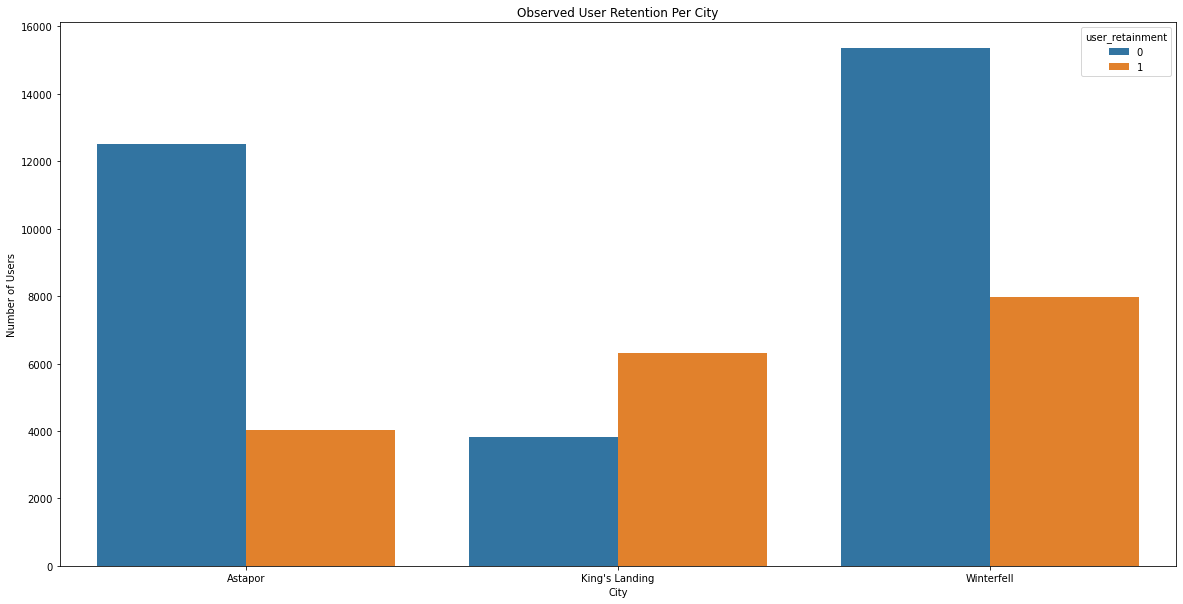

In [31]:
sns.barplot(data=city_active, x='city', y='total', hue='user_retainment')
plt.xlabel('City')
plt.ylabel('Number of Users')
plt.title('Observed User Retention Per City')
plt.show()

#### King's Landing appears to have the best user retention rate of the three different cities.

In [32]:
ult_df_nonactive = ult_df[ult_df['user_retainment'] == 0]
ult_df_active = ult_df[ult_df['user_retainment'] == 1]

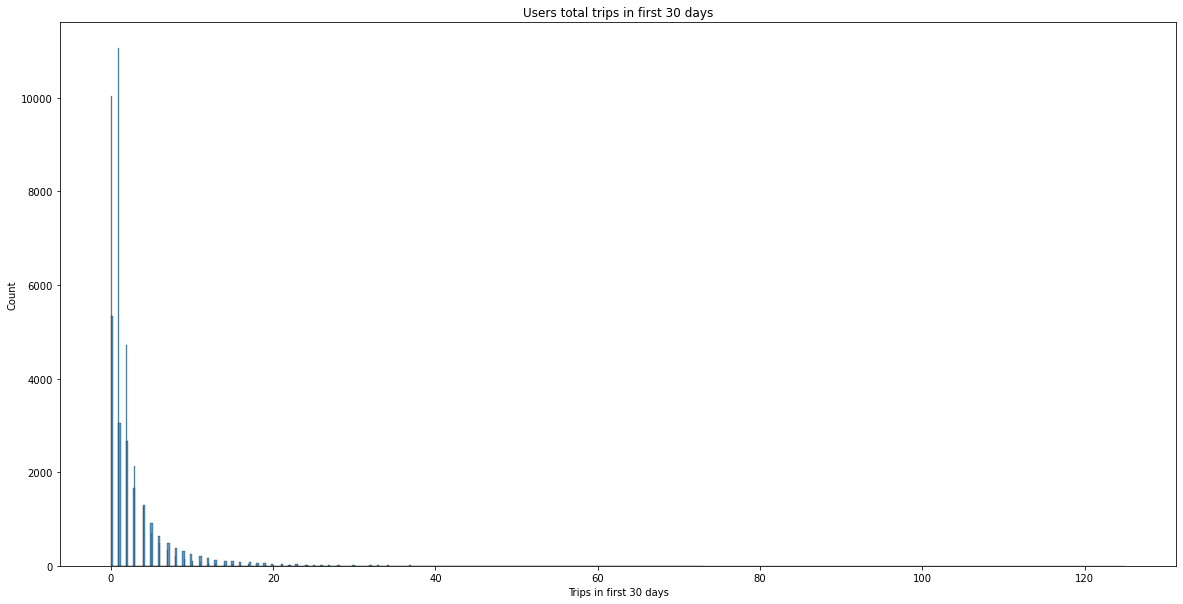

In [33]:
sns.histplot(data=ult_df_nonactive, x='trips_in_first_30_days')
sns.histplot(data=ult_df_active, x='trips_in_first_30_days')
plt.xlabel("Trips in first 30 days")
plt.ylabel("Count")
plt.title("Users total trips in first 30 days")
plt.show()

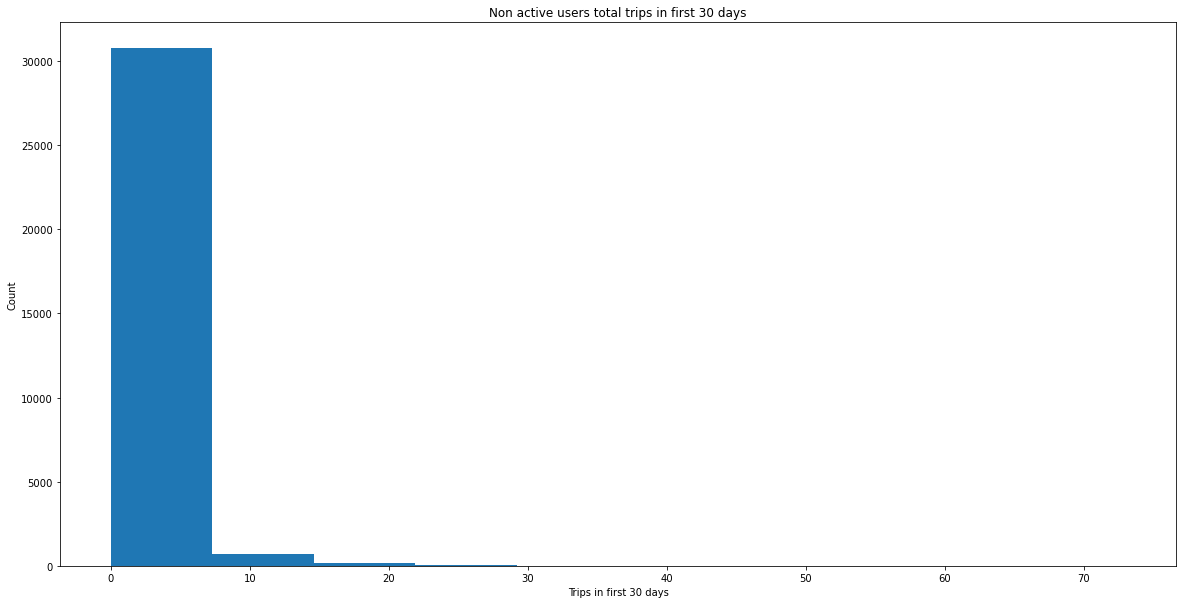

In [34]:
plt.hist(x=ult_df_nonactive['trips_in_first_30_days'])
plt.xlabel("Trips in first 30 days")
plt.ylabel("Count")
plt.title("Non active users total trips in first 30 days")
plt.show()

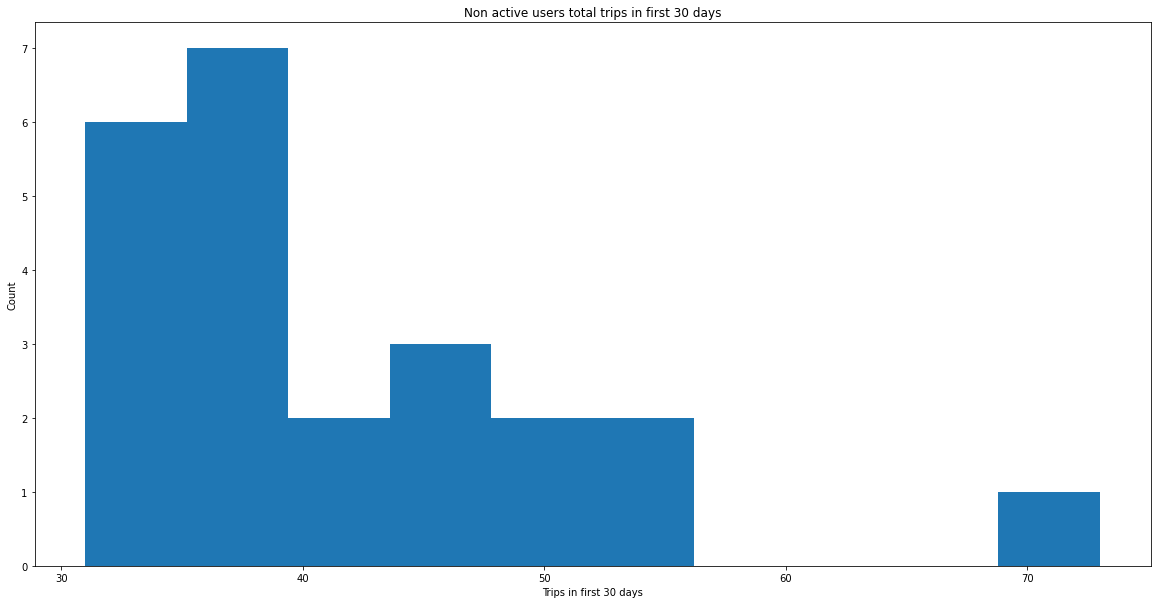

In [35]:
plt.hist(x=ult_df_nonactive['trips_in_first_30_days'][ult_df_nonactive['trips_in_first_30_days'] > 30])
plt.xlabel("Trips in first 30 days")
plt.ylabel("Count")
plt.title("Non active users total trips in first 30 days")
plt.show()

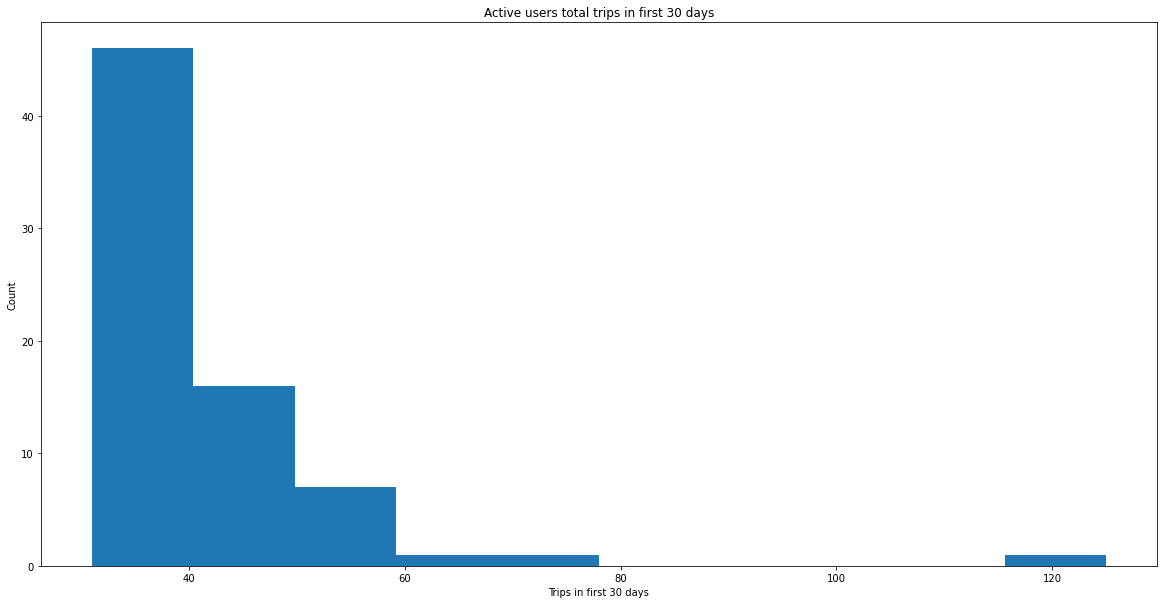

In [36]:
plt.hist(x=ult_df_active['trips_in_first_30_days'][ult_df_active['trips_in_first_30_days'] > 30])
plt.xlabel("Trips in first 30 days")
plt.ylabel("Count")
plt.title("Active users total trips in first 30 days")
plt.show()

#### The max trips count for the first 30 days is much higher for the active users than nonactive users. Additionally, the active users were much more likely to average at least one trip per day compared with the nonactive users.

In [37]:
ult_df_active.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'user_retainment'],
      dtype='object')

Text(0, 0.5, 'Count')

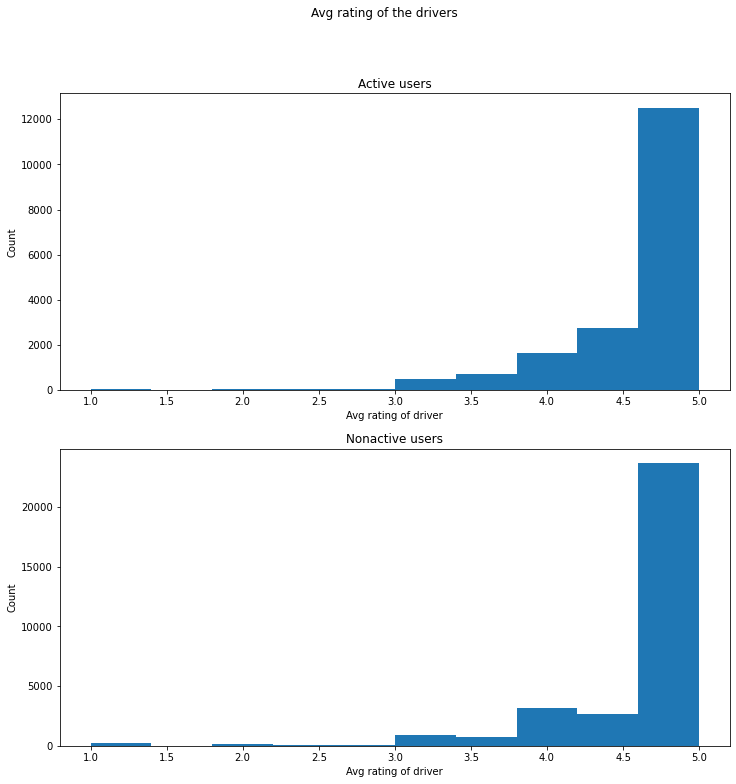

In [38]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))

plt.suptitle('Avg rating of the drivers')

ax1.hist(ult_df_active.avg_rating_of_driver)
ax1.set_title('Active users')
ax1.set_xlabel('Avg rating of driver')
ax1.set_ylabel('Count')

ax2.hist(ult_df_nonactive.avg_rating_of_driver)
ax2.set_title('Nonactive users')
ax2.set_xlabel('Avg rating of driver')
ax2.set_ylabel('Count')

Text(0, 0.5, 'Count')

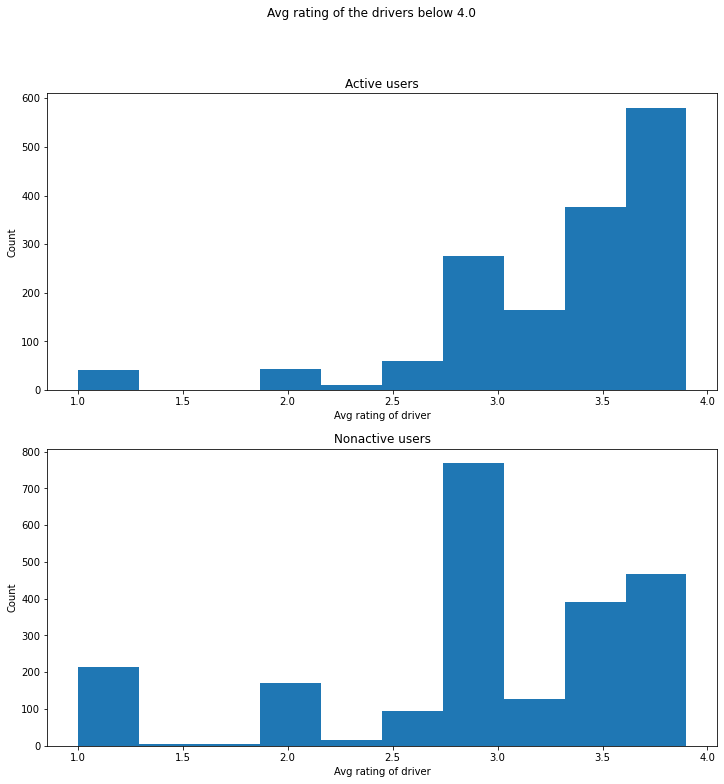

In [39]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,12))

plt.suptitle('Avg rating of the drivers below 4.0')

ax1.hist(ult_df_active.avg_rating_of_driver[ult_df_active['avg_rating_of_driver'] < 4.0])
ax1.set_title('Active users')
ax1.set_xlabel('Avg rating of driver')
ax1.set_ylabel('Count')

ax2.hist(ult_df_nonactive.avg_rating_of_driver[ult_df_nonactive['avg_rating_of_driver'] < 4.0])
ax2.set_title('Nonactive users')
ax2.set_xlabel('Avg rating of driver')
ax2.set_ylabel('Count')

#### There appears to be a significant increase in driver ratings below 3.0 for nonactive users.

In [40]:
ult_df.columns

Index(['city', 'trips_in_first_30_days', 'signup_date', 'avg_rating_of_driver',
       'avg_surge', 'last_trip_date', 'phone', 'surge_pct',
       'ultimate_black_user', 'weekday_pct', 'avg_dist',
       'avg_rating_by_driver', 'user_retainment'],
      dtype='object')

In [41]:
ult_df_corr = ult_df.drop(columns=['signup_date', 'last_trip_date'])
ult_df_corr = pd.get_dummies(ult_df_corr)
ult_df_corr.corr()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_retainment,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_N/A,phone_iPhone
trips_in_first_30_days,1.000000,-0.011060,-0.001841,0.005720,0.112210,0.050388,-0.136329,-0.039097,0.214728,-0.061075,0.024650,0.037735,-0.059309,0.002786,0.058342
avg_rating_of_driver,-0.011060,1.000000,-0.021653,-0.003290,-0.001916,0.012587,0.028508,0.101660,-0.010082,0.029814,0.082156,-0.094304,0.024206,0.001530,-0.024323
avg_surge,-0.001841,-0.021653,1.000000,0.793582,-0.078791,-0.110071,-0.081491,0.010498,-0.003567,0.037172,-0.009198,-0.027643,-0.008977,-0.011423,0.011104
surge_pct,0.005720,-0.003290,0.793582,1.000000,-0.106861,-0.144918,-0.104414,0.019964,0.010612,0.045457,0.028221,-0.065603,-0.010150,-0.014456,0.012851
ultimate_black_user,0.112210,-0.001916,-0.078791,-0.106861,1.000000,0.035998,0.032310,0.009328,0.210259,0.021259,0.039649,-0.051990,-0.075836,0.043145,0.067002
weekday_pct,0.050388,0.012587,-0.110071,-0.144918,0.035998,1.000000,0.101652,0.020366,0.026413,-0.010540,0.031349,-0.015318,-0.009241,0.012753,0.006726
avg_dist,-0.136329,0.028508,-0.081491,-0.104414,0.032310,0.101652,1.000000,0.079793,-0.090279,-0.045431,0.015877,0.030050,0.020888,0.022372,-0.025030
avg_rating_by_driver,-0.039097,0.101660,0.010498,0.019964,0.009328,0.020366,0.079793,1.000000,-0.025595,0.032518,0.084480,-0.098727,0.008765,0.007433,-0.010127
user_retainment,0.214728,-0.010082,-0.003567,0.010612,0.210259,0.026413,-0.090279,-0.025595,1.000000,-0.179373,0.268272,-0.046985,-0.231731,-0.007032,0.231391
city_Astapor,-0.061075,0.029814,0.037172,0.045457,0.021259,-0.010540,-0.045431,0.032518,-0.179373,1.000000,-0.354298,-0.657563,0.025642,-0.004772,-0.024539


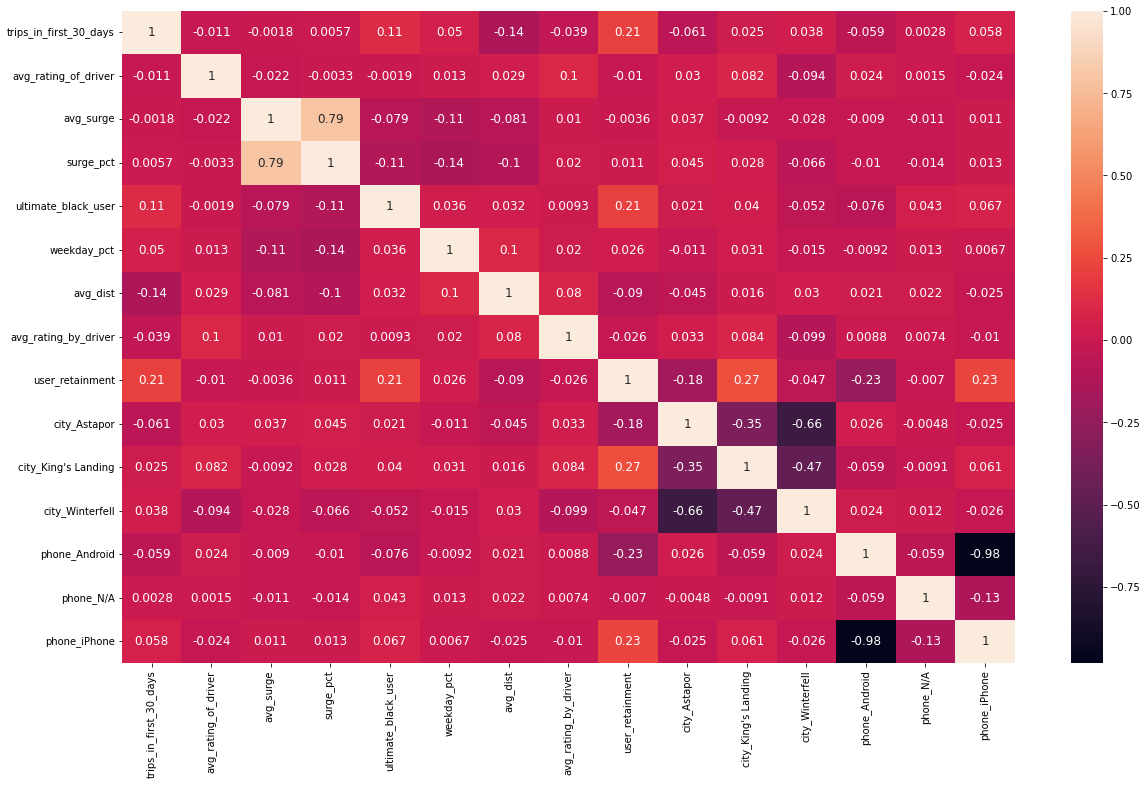

In [42]:
# take a look at the correlation heatmap

plt.figure(figsize=(20,12))
sns.heatmap(ult_df_corr.corr(), annot=True, annot_kws={"size": 12})
plt.show()

2. Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [43]:
df_pred = ult_df_corr
df_pred.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,user_retainment,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_N/A,phone_iPhone
0,4,4.7,1.10,15.4,True,46.2,3.67,5.0,1,0,1,0,0,0,1
1,0,5.0,1.00,0.0,False,50.0,8.26,5.0,0,1,0,0,1,0,0
2,3,4.3,1.00,0.0,False,100.0,0.77,5.0,0,1,0,0,0,0,1
3,9,4.6,1.14,20.0,True,80.0,2.36,4.9,1,0,1,0,0,0,1
4,14,4.4,1.19,11.8,False,82.4,3.13,4.9,0,0,0,1,1,0,0


## Predictive Models

In [44]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, plot_confusion_matrix,confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score,f1_score, precision_recall_curve
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier

#### Train/Test Splits

In [45]:
# split the data from the df 
X = df_pred.drop(columns = 'user_retainment')
y = df_pred.user_retainment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [46]:
# scale the features data

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)


### Random Forest

In [47]:
%%time

rf_class = RandomForestClassifier(random_state=18)
params = {'n_estimators'      : [50],
          'max_features'      : [3, 6, 9],
          'max_depth'         : [x for x in range(5, 20, 5)],
          'min_samples_leaf'  : [x for x in range(100, 1000, 100)]
         }

rf_model = GridSearchCV(estimator=rf_class, param_grid=params, cv=5)
rf_model.fit(X_train_scaled, y_train)

Wall time: 6min 30s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=18),
             param_grid={'max_depth': [5, 10, 15], 'max_features': [3, 6, 9],
                         'min_samples_leaf': [100, 200, 300, 400, 500, 600, 700,
                                              800, 900],
                         'n_estimators': [50]})

In [48]:
print("Best Parameters for RandomForestClassifier       : ", rf_model.best_params_)
print("\n")
print("Best average accuracy for RandomForestClassifier :", rf_model.best_score_)

Best Parameters for RandomForestClassifier       :  {'max_depth': 15, 'max_features': 6, 'min_samples_leaf': 100, 'n_estimators': 50}


Best average accuracy for RandomForestClassifier : 0.7834


In [49]:
rf_model = RandomForestClassifier(**rf_model.best_params_)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      9452
           1       0.75      0.62      0.68      5548

    accuracy                           0.79     15000
   macro avg       0.78      0.75      0.76     15000
weighted avg       0.78      0.79      0.78     15000



In [50]:
roc_auc_score(y_test,y_pred_rf)

0.7523931870238149

In [51]:
y_pred_rf_p = rf_model.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test,y_pred_rf_p)

0.851222135231295

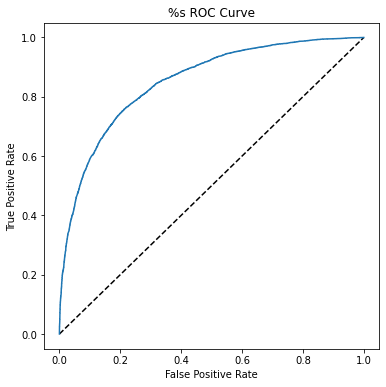

In [52]:
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_rf_p)
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve')
plt.show()

Confusion matrix


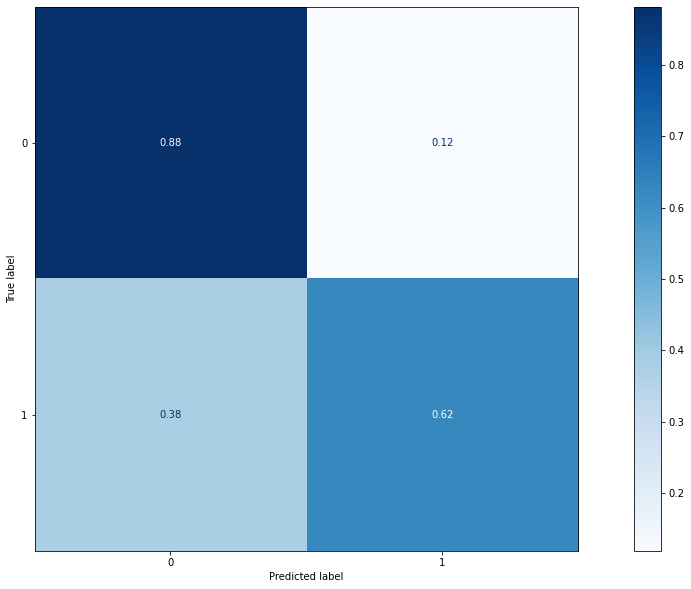

In [53]:
print("Confusion matrix")
plot_confusion_matrix(rf_model, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

### Logistic Regression

In [54]:
%%time

lr_class = LogisticRegression(random_state=18)
params = {'solver' : ['newton-cg','lbfgs', 'liblinear'],
          'C' : np.logspace(-3, 5, 10)
         }

lr_model = GridSearchCV(estimator=lr_class, param_grid=params, cv=5)
lr_model.fit(X_train_scaled, y_train)

Wall time: 11.9 s


GridSearchCV(cv=5, estimator=LogisticRegression(random_state=18),
             param_grid={'C': array([1.00000000e-03, 7.74263683e-03, 5.99484250e-02, 4.64158883e-01,
       3.59381366e+00, 2.78255940e+01, 2.15443469e+02, 1.66810054e+03,
       1.29154967e+04, 1.00000000e+05]),
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']})

In [55]:
print("Best Parameters for RandomForestClassifier       : ", lr_model.best_params_)
print("\n")
print("Best average accuracy for RandomForestClassifier :", lr_model.best_score_)

Best Parameters for RandomForestClassifier       :  {'C': 0.007742636826811269, 'solver': 'newton-cg'}


Best average accuracy for RandomForestClassifier : 0.7252571428571428


In [56]:
lr_model = LogisticRegression(**lr_model.best_params_)
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
print(classification_report(y_test,y_pred_lr))

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      9452
           1       0.68      0.48      0.57      5548

    accuracy                           0.72     15000
   macro avg       0.71      0.67      0.68     15000
weighted avg       0.72      0.72      0.71     15000



In [57]:
roc_auc_score(y_test,y_pred_lr)

0.6746976183843628

In [58]:
y_pred_lr_p = lr_model.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test,y_pred_lr_p)

0.7663748088852383

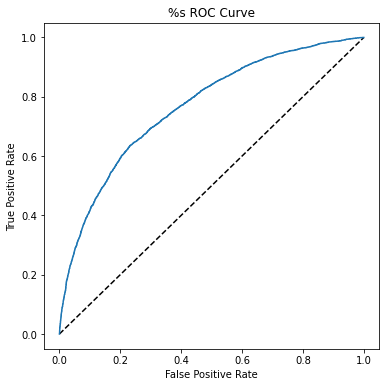

In [59]:
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_lr_p)
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve')
plt.show()

Confusion matrix


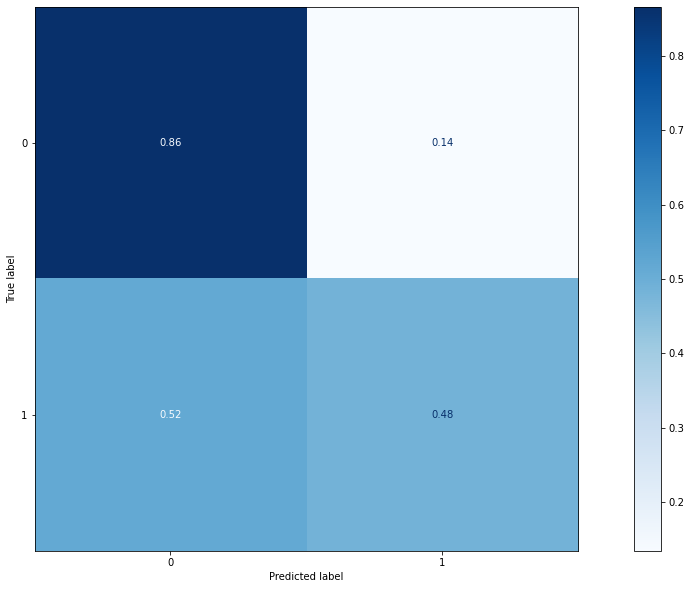

In [60]:
print("Confusion matrix")
plot_confusion_matrix(lr_model, X_test_scaled, y_test, cmap=plt.cm.Blues, normalize='true')
plt.show()

### Baseline Model: Dummy Classifier

In [61]:
dummy = DummyClassifier(strategy='most_frequent', random_state=65)
dummy.fit(X_train_scaled, y_train)
y_pred_dummy = dummy.predict(X_test_scaled)
y_pred_dummy_p = dummy.predict_proba(X_test_scaled)[::,1]
print(classification_report(y_test,y_pred_dummy))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      9452
           1       0.00      0.00      0.00      5548

    accuracy                           0.63     15000
   macro avg       0.32      0.50      0.39     15000
weighted avg       0.40      0.63      0.49     15000



C:\Users\matmi\anaconda_3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matmi\anaconda_3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\matmi\anaconda_3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [62]:
roc_auc_score(y_test,y_pred_dummy)

0.5

In [63]:
y_pred_dummy_p = dummy.predict_proba(X_test_scaled)[:,1]
roc_auc_score(y_test,y_pred_dummy_p)

0.5

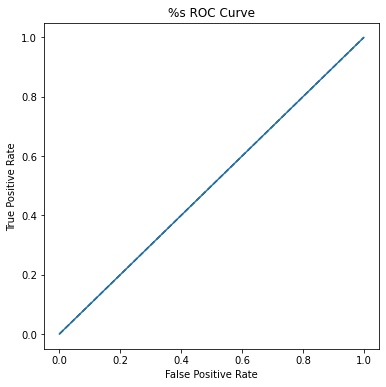

In [64]:
fpr, tpr, thresholds  = roc_curve(y_test, y_pred_dummy_p)
plt.figure(figsize=(6,6))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label='Baseline Model: DummyClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('%s ROC Curve')
plt.show()

Confusion matrix


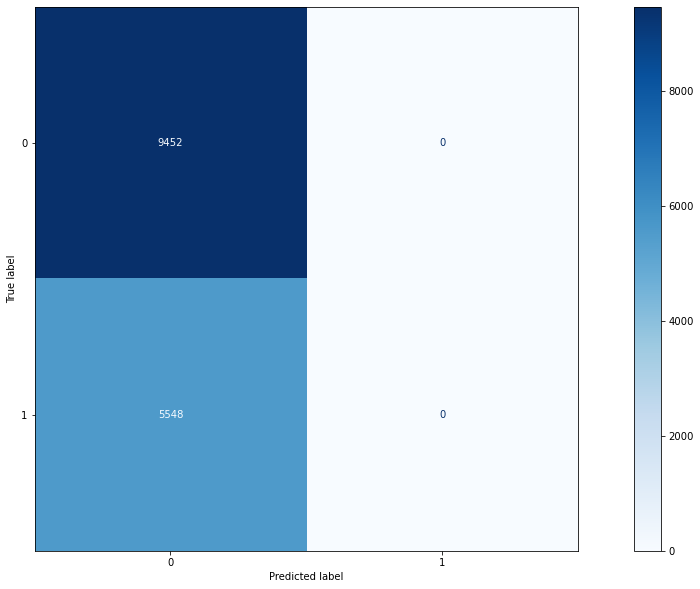

In [65]:
print("Confusion matrix")
plot_confusion_matrix(dummy, X_test_scaled, y_test, cmap=plt.cm.Blues)
plt.show()

In [66]:
scores=pd.DataFrame()

scores.loc['Random Forest', 'Accuracy'] = accuracy_score(y_test, y_pred_rf)
scores.loc['Random Forest', 'Precision'] = precision_score(y_test, y_pred_rf)
scores.loc['Random Forest', 'Recall'] = recall_score(y_test, y_pred_rf)
scores.loc['Random Forest', 'F1'] = f1_score(y_test, y_pred_rf)
scores.loc['Random Forest', 'AUC'] = roc_auc_score(y_test, y_pred_rf)

scores.loc['Logistic Regression', 'Accuracy'] = accuracy_score(y_test, y_pred_lr)
scores.loc['Logistic Regression', 'Precision'] = precision_score(y_test, y_pred_lr)
scores.loc['Logistic Regression', 'Recall'] = recall_score(y_test, y_pred_lr)
scores.loc['Logistic Regression', 'F1'] = f1_score(y_test, y_pred_lr)
scores.loc['Logistic Regression', 'AUC'] = roc_auc_score(y_test, y_pred_lr)

scores.loc['Dummy Classifier', 'Accuracy'] = accuracy_score(y_test, y_pred_dummy)
scores.loc['Dummy Classifier', 'Precision'] = precision_score(y_test, y_pred_dummy)
scores.loc['Dummy Classifier', 'Recall'] = recall_score(y_test, y_pred_dummy)
scores.loc['Dummy Classifier', 'F1'] = f1_score(y_test, y_pred_dummy)
scores.loc['Dummy Classifier', 'AUC'] = roc_auc_score(y_test, y_pred_dummy)

C:\Users\matmi\anaconda_3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [67]:
scores

,Accuracy,Precision,Recall,F1,AUC
Random Forest,0.785667,0.753752,0.624549,0.683095,0.752393
Logistic Regression,0.724200,0.677932,0.484499,0.565121,0.674698
Dummy Classifier,0.630133,0.000000,0.000000,0.000000,0.500000


### Answer to Part 2 

As can be seen in the models comparison table above, there is a clear advantage of using the machine learning models ability to recognize patterns and make decisions when compared to the Dummy Classifier, which represents the best guesses of a human. The Random Forest model, with hypertuned parameters, represents the best choice of the models we created. It is ~15% more accurate than the dummy classifier and can determine if a user will remain active for the next 6 months. 

3. Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

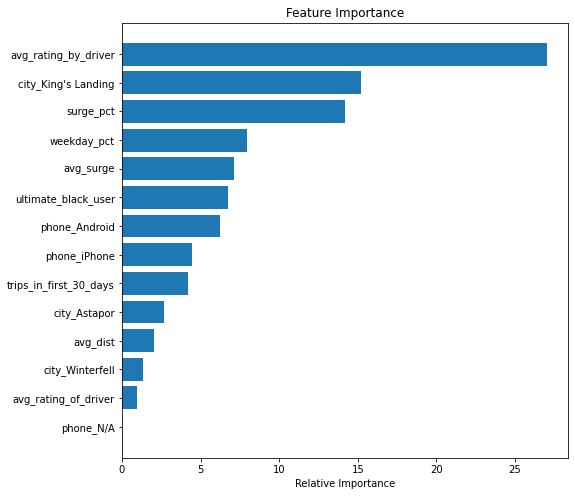

In [68]:
feature_import = rf_model.feature_importances_[:len(X_train_scaled)]
feature_import = feature_import*100

sorted_idx = np.argsort(feature_import)
pos = np.arange(sorted_idx.shape[0])
sorted_idx.size
plt.figure(figsize=(8,8))
plt.barh(pos, feature_import[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Feature Importance')
plt.show()

### Answer to Part 3

The average rating by the driver is the top importance, whereas the average rating of the driver is the 2nd least important feature, which may be surprising. Additionally, the surge percentage and City of King's Landing are the next highest important features. 

Taking a look at the correlation table we see that the average rating by driver is negatively correlated with user retainment. Apparently, active users are less popular with drivers. A deeper study and possible survey of the drivers could help Ultimate in understanding this dynamic better. Additionally, they could encourage drivers to maintain a positive and hospitable attitude towards the less accomadating users considering they are most likely to come back as customers. 

Another interesting correlation is between the surge percentage and user retention. Active users are more likely to pay higher prices at times of surge pricing. Ultimate should inform and encourage their drivers to be active at times when surge prices are expected as these customers are most likely to return. 

Finally, Ultimate should encourage its drivers to maintain actiivity in King's Landing considering customer's from this City are more likely to be retained. Additionally, Ultimate could consider running advertisements and promotions in the Cities of Astapor and Winterfell to encourage retention in those areas.